# Analysis Challenge Assignment 3
#### Author: Madeline Maeloa

## Import and Clean

In [123]:
# Import necessary modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [124]:
# Importing the dataset
collegeData = pd.read_csv("CollegeScorecard2.csv")
collegeData

/Users/madelinemaeloa/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (7,9,1427,1542,1561,1575) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,UNITID,OPEID,opeid6,INSTNM,CITY,STABBR,ZIP,AccredAgency,INSTURL,NPCURL,...,COMPL_RPY_3YR_RT_SUPP,NONCOM_RPY_3YR_RT_SUPP,DEP_RPY_3YR_RT_SUPP,IND_RPY_3YR_RT_SUPP,PELL_RPY_3YR_RT_SUPP,NOPELL_RPY_3YR_RT_SUPP,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,galileo.aamu.edu/netpricecalculator/npcalc.htm,...,0.578873239,0.373790022,0.442857143,0.45890411,0.443586698,0.452513966,0.484818805,0.406,0.423580786,0.44245283
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,www.collegeportraits.org/AL/UAB/estimator/agree,...,0.847800926,0.678748759,0.767798013,0.739164697,0.732297853,0.795454545,0.760521886,0.755344418,0.751552795,0.765074771
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,tcc.noellevitz.com/(S(miwoihs5stz5cpyifh4nczu0...,...,0.807692308,0.61328125,PrivacySuppressed,0.641114983,0.600877193,0.775,0.610465116,0.686567164,0.632653061,0.65
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.892045455,0.689788054,0.800347222,0.75564409,0.738341969,0.851405622,0.768378651,0.79844098,0.778156997,0.791666667
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/email/index.aspx,www.alasu.edu/cost-aid/forms/calculator/index....,...,0.482490272,0.315996848,0.32410212,0.350993377,0.320016821,0.380829016,0.364423718,0.286530612,0.315737052,0.334633385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7799,48285703,157107,1571,Georgia Military College-Columbus Campus,Columbus,GA,31909,NaN,http://columbus.gmc.cc.ga.us/,NaN,...,0.586956522,0.473891273,0.482781027,0.478442281,0.42789148,0.607753706,0.490091055,0.461751152,0.490384615,0.495152871
7800,48285704,157101,1571,Georgia Military College-Valdosta Campus,Valdosta,GA,31605,NaN,http://valdosta.gmc.cc.ga.us/,NaN,...,0.586956522,0.473891273,0.482781027,0.478442281,0.42789148,0.607753706,0.490091055,0.461751152,0.490384615,0.495152871
7801,48285705,157105,1571,Georgia Military College-Warner Robins Campus,Warner Robins,GA,31093,NaN,http://robins.gmc.cc.ga.us/,NaN,...,0.586956522,0.473891273,0.482781027,0.478442281,0.42789148,0.607753706,0.490091055,0.461751152,0.490384615,0.495152871
7802,48285706,157100,1571,Georgia Military College-Online,Milledgeville,GA,31061,NaN,http://online.gmc.cc.ga.us/,NaN,...,0.586956522,0.473891273,0.482781027,0.478442281,0.42789148,0.607753706,0.490091055,0.461751152,0.490384615,0.495152871


In [125]:
# Creates a new table called collegeData with variables to include in clustering
# Admission rate (ADM_RATE) is used to measure achievement and prestigiousness of a school
# Cost of attending to measure pupil's expensitures (COSTT4_A)
# How many students take out a loan (PCTFLOAN)
# Average SAT (SAT_AVG) is used to determine achievement as well
# Proportions of each race represented in each school is also given in this table
college = data[['UNITID','ADM_RATE','COSTT4_A','PCTFLOAN','SAT_AVG','UGDS_WHITE','UGDS_BLACK','UGDS_HISP','UGDS_ASIAN','UGDS_AIAN','UGDS_NHPI']]
college

,UNITID,ADM_RATE,COSTT4_A,PCTFLOAN,SAT_AVG,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI
0,100654,0.8989,18888.0,0.8204,823.0,0.0279,0.9501,0.0089,0.0022,0.0012,0.0010
1,100663,0.8673,19990.0,0.5397,1146.0,0.5987,0.2590,0.0258,0.0518,0.0026,0.0007
2,100690,NaN,12300.0,0.7629,NaN,0.2919,0.4224,0.0093,0.0031,0.0031,0.0031
3,100706,0.8062,20306.0,0.4728,1180.0,0.7012,0.1310,0.0338,0.0364,0.0145,0.0002
4,100724,0.5125,17400.0,0.8735,830.0,0.0161,0.9285,0.0114,0.0015,0.0009,0.0007
...,...,...,...,...,...,...,...,...,...,...,...
7799,48285703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7800,48285704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7801,48285705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7802,48285706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
# Removing UNITID variable and schools with NaN values so that we can find clusters of similar schools on these variables
# New table is called collegeClean 
collegeClean = college.dropna()
collegeClean = collegeNA.drop(['UNITID'], axis = 1)
collegeClean

,ADM_RATE,COSTT4_A,PCTFLOAN,SAT_AVG,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI
0,0.8989,18888.0,0.8204,823.0,0.0279,0.9501,0.0089,0.0022,0.0012,0.0010
1,0.8673,19990.0,0.5397,1146.0,0.5987,0.2590,0.0258,0.0518,0.0026,0.0007
3,0.8062,20306.0,0.4728,1180.0,0.7012,0.1310,0.0338,0.0364,0.0145,0.0002
4,0.5125,17400.0,0.8735,830.0,0.0161,0.9285,0.0114,0.0015,0.0009,0.0007
5,0.5655,26717.0,0.4148,1171.0,0.7865,0.1140,0.0313,0.0112,0.0044,0.0011
...,...,...,...,...,...,...,...,...,...,...
6917,0.8815,40896.0,0.5362,1069.0,0.5714,0.0071,0.2000,0.0786,0.0071,0.0000
7185,0.7138,25441.0,0.5769,968.0,0.7523,0.0686,0.0766,0.0240,0.0025,0.0023
7322,0.4103,7715.0,0.5241,1002.0,0.5702,0.2582,0.0517,0.0321,0.0048,0.0044
7370,0.6102,16525.0,0.3858,1009.0,0.7901,0.0449,0.0859,0.0283,0.0023,0.0012


## Finding the Number of Clusters Using Silhouette Plot

In [142]:
# Importing necessary modules to run silhouette plot
# Use Silhouette Visualizer to obtain silhouette plot
# It is useful for determining cluster imbalance, or for selecting a value for K by comparing multiple visualizers
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import silhouette_visualizer
from sklearn.metrics import silhouette_score

### 2 Clusters

/Users/madelinemaeloa/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


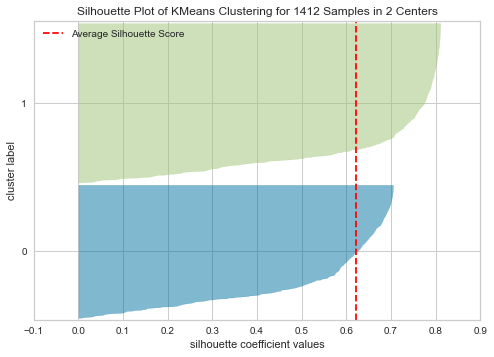

Silhouetter Score: 0.6220330858061259


In [143]:
# Here, k is equal to 2, meaning we are creating a silhouette plot with 2 clusters 
# The silhouetter score is 0.622

collegekmeans2 = KMeans(n_clusters=2)
collegekmeans2.fit(collegeClean)
cluster_college2 = collegekmeans2.predict(collegeClean)


silhouette_visualizer(collegekmeans2, collegeClean, colors='yellowbrick')
silhouetteScore2 = silhouette_score(collegeClean, cluster_college2, metric='euclidean')
print('Silhouetter Score:', silhouetteScore2)

### 3 Clusters

/Users/madelinemaeloa/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


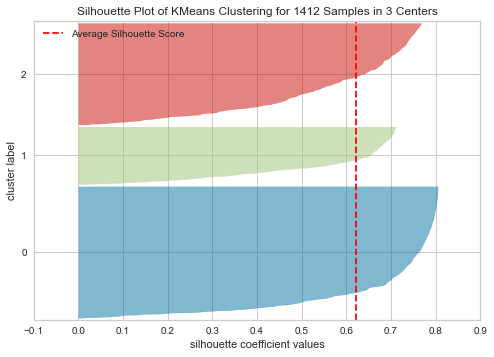

Silhouetter Score: 0.6207722796720304


In [144]:
# We now try k = 3
# The silhouetter score is 0.62, which is just a little bit less than with k = 2
collegekmeans3 = KMeans(n_clusters=3)
collegekmeans3.fit(collegeClean)
cluster_college3 = collegekmeans3.predict(collegeClean)

silhouette_visualizer(collegekmeans3, collegeClean, colors='yellowbrick')
silhouetteScore3 = silhouette_score(collegeClean, cluster_college3, metric='euclidean')
print('Silhouetter Score:', silhouetteScore3)

### 4 Clusters

/Users/madelinemaeloa/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


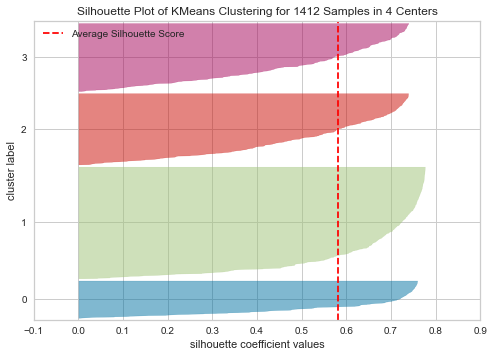

Silhouetter Score: 0.5811758501755641


In [145]:
# Try k = 4, or 4 clusters
# The score drops to 0.58

collegekmeans4 = KMeans(n_clusters=4)
collegekmeans4.fit(collegeClean)
cluster_college4 = collegekmeans4.predict(collegeClean)

silhouette_visualizer(collegekmeans4, collegeClean, colors='yellowbrick')
silhouetteScore4 = silhouette_score(collegeClean, cluster_college4, metric='euclidean')
print('Silhouetter Score:', silhouetteScore4)

In [146]:
# 3 clusters is better than 2 or 4 because it has the highest silhouetter score 
# 3 is marginally bigger than 2
# However, I will do the clustering for 2 and 3 to compare since the score is similar (0.622 and 0.620)

## KMeans Clustering for 2 Clusters

In [147]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [148]:
# Initializing the model by telling KMeans() the number of k, which is 2 in this case
kmeans = KMeans(n_clusters=2)
# Then, we feed the data that we called collegeClean to the model
kmeans.fit(collegeClean)
# Lastly, call predict() and use the data to get the clustering result
cluster_kmeans = kmeans.predict(collegeClean)

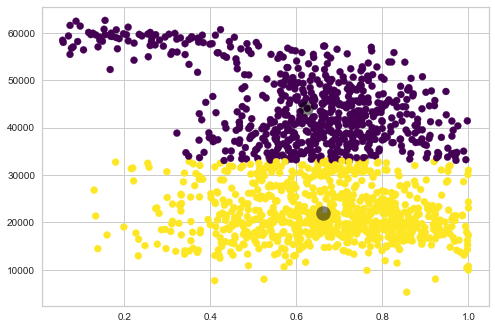

In [149]:
# Visualize data in a scatterplot
# Use cluster_means as the indicator for clusters
collegeClean2 = collegeClean.iloc[:,:-1].values
plt.scatter(collegeClean2[:, 0], collegeClean2[:, 1], c=cluster_kmeans, cmap='viridis')
centers = kmeans.cluster_centers_
# Plotting the centers onto scatter plot
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5); 

## KMeans Clustering for 3 Clusters

In [167]:
# Initializing the model by telling KMeans() the number of k, which is 2 in this case
kmeans = KMeans(n_clusters=3)
# Then, feed the data to the model
kmeans.fit(collegeClean)
# Lastly, call predict() and use the data to get the clustering result
cluster_kmeans = kmeans.predict(collegeClean)

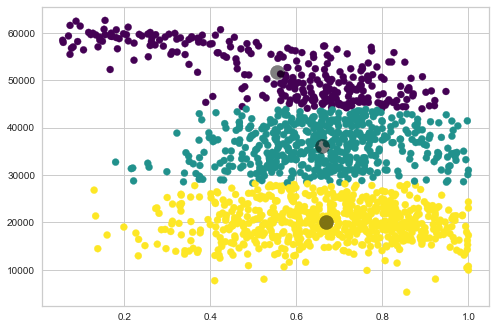

In [168]:
# Visualize data in a scatterplot
# Use cluster_means as the indicator for clusters
collegeClean2 = collegeClean.iloc[:,:-1].values
plt.scatter(collegeClean2[:, 0], collegeClean2[:, 1], c=cluster_kmeans, cmap='viridis')
centers = kmeans.cluster_centers_
# Plotting the centers onto scatter plot
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5); 

In [152]:
# In the end, we go with 3 clusters (k=3) because the plot shows 3 distinct and more clear clusters

## Results

In [157]:
# Here we are creating a new dataframe to show which colleges are in which cluster
# The new dataframe is called college3cluster
college3cluster = collegeClean.copy(deep=True)
college3cluster['cluster'] = cluster_kmeans
college3cluster

,ADM_RATE,COSTT4_A,PCTFLOAN,SAT_AVG,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,cluster
0,0.8989,18888.0,0.8204,823.0,0.0279,0.9501,0.0089,0.0022,0.0012,0.0010,1
1,0.8673,19990.0,0.5397,1146.0,0.5987,0.2590,0.0258,0.0518,0.0026,0.0007,1
3,0.8062,20306.0,0.4728,1180.0,0.7012,0.1310,0.0338,0.0364,0.0145,0.0002,1
4,0.5125,17400.0,0.8735,830.0,0.0161,0.9285,0.0114,0.0015,0.0009,0.0007,1
5,0.5655,26717.0,0.4148,1171.0,0.7865,0.1140,0.0313,0.0112,0.0044,0.0011,1
...,...,...,...,...,...,...,...,...,...,...,...
6917,0.8815,40896.0,0.5362,1069.0,0.5714,0.0071,0.2000,0.0786,0.0071,0.0000,2
7185,0.7138,25441.0,0.5769,968.0,0.7523,0.0686,0.0766,0.0240,0.0025,0.0023,1
7322,0.4103,7715.0,0.5241,1002.0,0.5702,0.2582,0.0517,0.0321,0.0048,0.0044,1
7370,0.6102,16525.0,0.3858,1009.0,0.7901,0.0449,0.0859,0.0283,0.0023,0.0012,1


In [164]:
# We merge the original data (called college) with the new dataframe we just created called college3cluster
# This is so that we can see which colleges (UNITID) belong in which cluster (1, 2, or 3)
pd.merge(college, college3cluster)

,UNITID,ADM_RATE,COSTT4_A,PCTFLOAN,SAT_AVG,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,cluster
0,100654,0.8989,18888.0,0.8204,823.0,0.0279,0.9501,0.0089,0.0022,0.0012,0.0010,1
1,100663,0.8673,19990.0,0.5397,1146.0,0.5987,0.2590,0.0258,0.0518,0.0026,0.0007,1
2,100706,0.8062,20306.0,0.4728,1180.0,0.7012,0.1310,0.0338,0.0364,0.0145,0.0002,1
3,100724,0.5125,17400.0,0.8735,830.0,0.0161,0.9285,0.0114,0.0015,0.0009,0.0007,1
4,100751,0.5655,26717.0,0.4148,1171.0,0.7865,0.1140,0.0313,0.0112,0.0044,0.0011,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1407,462354,0.8815,40896.0,0.5362,1069.0,0.5714,0.0071,0.2000,0.0786,0.0071,0.0000,2
1408,479956,0.7138,25441.0,0.5769,968.0,0.7523,0.0686,0.0766,0.0240,0.0025,0.0023,1
1409,482149,0.4103,7715.0,0.5241,1002.0,0.5702,0.2582,0.0517,0.0321,0.0048,0.0044,1
1410,482680,0.6102,16525.0,0.3858,1009.0,0.7901,0.0449,0.0859,0.0283,0.0023,0.0012,1


## Interpretation

#### The first cluster is the bottom most cluster, which is the one in yellow color. This cluster contains the schools with the lowest costs and average SAT scores. 

#### The second cluster is the middle one in green color. It has a medium cost and medium average SAT scores. From the plot, this cluster is about the same in terms of diversity, admission rate, and number of undergraduates who recieve a federal loan as the first cluster schools. 

#### The third cluster, which is purple in color, has the schools with the highest costs and highest average SAT scores. From the plot, it looks like this cluster of schools is the least diverse because they have a low proportion of students who are of various ethinicities.

#### I am not sure of how I can make the clusters like how it was shown in ICE 5. This is something I would probably looking into improving next time. I felt like the clusters I got were quite hard to distinguish, but I tried it with multiple other variable combinations and this seemed to work the best for now..